In [ ]:
""" -----LECTURE 3----- """

In [12]:
""" EXAMPLE 1 """

# GOAL: Linear regression to find out if correlation exists between # fires & # thefts in Chicago
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import xlrd

DATA_FILE = "data/fire_theft.xls"

# Step 1: read in data from .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (# fires) and label Y (# thefts)
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# dummy data - does not work
#X = np.linspace(-1.0, 1.0, 100.0)
#Y = X * 3 + np.random.randn(X.shape[0]) * 0.5
#X, Y = hash(tuple(X)), hash(tuple(Y))

# Step 3: create weight and bias
w = tf.Variable(0.01, name="weight")
u = tf.Variable(0.01, name="weights_2")
b = tf.Variable(0.0, name="bias")

# Step 4: build model to predict Y
Y_predicted = X * w + b
#Z_predicted = X * X * w + X * u + b                doesn't work?
#print(Y_predicted.eval())
#print(Z_predicted.eval())
#Y_predicted += X * (w + w2)

# Step 5: specify loss function
loss = tf.square(Y - Y_predicted, name="loss")

# Step 6: create optimizer for loss
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
    
    # Step 7: initialize the necessary variables
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('./my_graph/03/linear_reg', sess.graph)
    
    # Step 8: train the model
    for i in range(100):
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        
    writer.close()
        
    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b])
    #w2_value = sess.run([w2])

Epoch 0: 1624.41285565
Epoch 1: 1598.92220243
Epoch 2: 1574.484648
Epoch 3: 1550.39099114
Epoch 4: 1526.66545256
Epoch 5: 1503.31898407
Epoch 6: 1480.35511446
Epoch 7: 1457.77354129
Epoch 8: 1435.57225727
Epoch 9: 1413.74819006
Epoch 10: 1392.297495
Epoch 11: 1371.21619373
Epoch 12: 1350.49991696
Epoch 13: 1330.14417187
Epoch 14: 1310.14440843
Epoch 15: 1290.49601773
Epoch 16: 1271.19438766
Epoch 17: 1252.23509139
Epoch 18: 1233.61354973
Epoch 19: 1215.32507579
Epoch 20: 1197.36536934
Epoch 21: 1179.72974078
Epoch 22: 1162.4138803
Epoch 23: 1145.41353371
Epoch 24: 1128.72435833
Epoch 25: 1112.34189542
Epoch 26: 1096.2621054
Epoch 27: 1080.4808465
Epoch 28: 1064.99407741
Epoch 29: 1049.79743331
Epoch 30: 1034.88715008
Epoch 31: 1020.25922421
Epoch 32: 1005.90984444
Epoch 33: 991.834992817
Epoch 34: 978.030820756
Epoch 35: 964.493518557
Epoch 36: 951.219538235
Epoch 37: 938.205065863
Epoch 38: 925.446617399
Epoch 39: 912.940480096
Epoch 40: 900.682865438
Epoch 41: 888.670434316
Epoch 42:

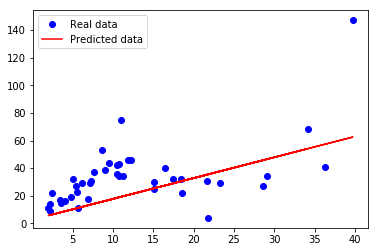

In [13]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

In [37]:
""" Huber Loss - to deal with Outliers (w/ large square loss) """

def huber_loss (labels, predictions, delta=1.0):
    """ square if large, abs value if small"""
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_residual = 0.5 * tf.square(residual)
    large_residual = delta * residual - 0.5 * tf.square(delta)
    # if residual < delta, ret small_res; else, ret large_res
    return tf.select(condition, small_res, large_res)

In [10]:
""" Linear Regression model """
    
#Y is one-hot
# send X and Y in matches -- mini-batch gradient descent

' Linear Regression model '

In [36]:
""" EXAMPLE 2 """


"""
Starter code for logistic regression model to solve OCR task 
with MNIST in TensorFlow
MNIST dataset: yann.lecun.com/exdb/mnist/
"""

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time

# Define parameters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 10

# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('./data/mnist', one_hot=True) 

# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
X = tf.placeholder(tf.float32, [batch_size, 784], name="image")
Y = tf.placeholder(tf.float32, [batch_size, 10], name="label")

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w) + b
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name="weights")
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
# to get the probability distribution of possible label of the image
# DO NOT DO SOFTMAX HERE

logits = tf.matmul(X, w) + b

# Step 5: define loss function
# use cross entropy loss of the real labels with the softmax of logits
# use the method:
# tf.nn.softmax_cross_entropy_with_logits(logits, Y)
# then use tf.reduce_mean to get the mean loss of the batch

entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)
loss = tf.reduce_mean(entropy)

# Step 6: define training op
# using gradient descent to minimize loss

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)              #92%
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)  #84%

with tf.Session() as sess:
    # to visualize with TensorBoard
    writer = tf.summary.FileWriter('./my_graph/03/logistic_reg', sess.graph)
                
    start_time = time.time()
    sess.run(tf.global_variables_initializer())	
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            # run optimizer + fetch loss_batch
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
            # 
            total_loss += loss_batch
        print 'Average loss epoch {0}: {1}'.format(i, total_loss/n_batches)

    print 'Total time: {0} seconds'.format(time.time() - start_time)

    print('Optimization Finished!') # should be around 0.35 after 25 epochs

    # test the model
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        logits_batch = sess.run(logits, feed_dict={X: X_batch, Y: Y_batch})
        probs = tf.nn.softmax(logits_batch)
        correct_probs = tf.equal(tf.argmax(probs, 1), tf.argmax(Y_batch, 1))
        num_correct = tf.reduce_sum(tf.cast(correct_probs, tf.float32)) # need numpy.count_nonzero(boolarr) :(
        total_correct_preds += sess.run(num_correct)

print 'Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Average loss epoch 0: 0.690402577112
Average loss epoch 1: 0.369173566327
Average loss epoch 2: 0.324579209228
Average loss epoch 3: 0.30455674106
Average loss epoch 4: 0.291594126494
Average loss epoch 5: 0.284206666973
Average loss epoch 6: 0.276253950259
Average loss epoch 7: 0.272331159692
Average loss epoch 8: 0.268997845759
Average loss epoch 9: 0.264387169831
Total time: 5.76252698898 seconds
Optimization Finished!
Accuracy 0.9235


In [3]:
""" MAXIMIZING MNIST PREDICTION """

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time

# Define parameters for the model
learning_rate = 0.01
batch_size = None
n_epochs = 20

# Step 1: Read in data
mnist = input_data.read_data_sets('./data/mnist', one_hot=True) 

# Step 2: create placeholders for features and labels
X = tf.placeholder(tf.float32, [batch_size, 784], name="image")
Y = tf.placeholder(tf.float32, [batch_size, 10], name="label")

# Step 3: create weights and bias
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.01), name="weights")
def bias_variable(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name="bias")

# Step 4: build model

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# first layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# reshape to 4d tensor [batch, width, height, colorchannels]
x_image = tf.reshape(X, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# second layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# fully connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)    #turns off dropout during testing (of keep_prob = 1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# readout layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# Step 5: define loss function

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=Y))

# Step 6: define training op

optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(y_conv, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
# Training

sess = tf.InteractiveSession()

if True:
    writer = tf.summary.FileWriter('./my_graph/03/logistic_reg', sess.graph)
                
    start_time = time.time()
    sess.run(tf.global_variables_initializer())	
    
    batch_size = 64
    #n_batches = int(mnist.train.num_examples/batch_size)
    n_batches = 400
    n_epochs = 25
    for i in range(n_epochs): # train the model n_epochs times
        if i % 1 == 0:
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            train_accuracy = accuracy.eval(feed_dict={X: X_batch, Y: Y_batch, keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            # run optimizer + fetch loss_batch
            optimizer.run(feed_dict={X: X_batch, Y: Y_batch, keep_prob: 0.5})
        

    print 'Total time: {0} seconds'.format(time.time() - start_time)

    print('Optimization Finished!') # should be around 0.35 after 25 epochs

    print('test accuracy %g' % accuracy.eval(feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.09375
step 1, training accuracy 0.953125
step 2, training accuracy 0.9375
step 3, training accuracy 0.9375
step 4, training accuracy 0.96875
step 5, training accuracy 1
step 6, training accuracy 0.984375
step 7, training accuracy 0.96875
step 8, training accuracy 0.953125
step 9, training accuracy 0.984375
step 10, training accuracy 0.96875
step 11, training accuracy 1
step 12, training accuracy 0.96875
step 13, training accuracy 0.984375
step 14, training accuracy 1
step 15, training accuracy 1
step 16, training accuracy 0.984375
step 17, training accuracy 1
step 18, training accuracy 0.984375
step 19, training accuracy 1
step 20, training accuracy 0.984375
step 21, training accuracy 1
step 22, training accuracy 1
step 23, training accuracy 0.984375
step 24, training accuracy 0.96875
Total time: 2241.22464395 seconds
Optimization Finished!
test accuracy 0.9912


In [5]:
print('test accuracy %g' % accuracy.eval(feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9912
